# Emerging Technologies Project - Model creation and training

## Introduction
In this Jupyter Notebook, I will demonstrate how my model is made, as well how the model is trained using the MNIST dataset. 

#### Summary
The model takes the images from the MNIST dataset and creates a model using the 70,000(60,000 training images, 10,000 test images) images supplied in the dataset which is then used to make a prediction on an image to make a prediction as to what that image is. This is done via building the model in layers and then training the model through epochs(iterating over the entire dataset = 1 epoch). The model then evaluates itself and is saved for use.

### Imports
 - Keras: API which is uded to build the neural network
 - Keras.Layers: Part of Keras library which is used to create layers on the model
 - Numpy: Used for initialization of test and training images/labels (Conversion to numpy arrays)
 - Gzip: Used to uzip MNIST data set from files
 - Sklearn: Used to encode the categorical variables
 - Matplotlib: Used to plot results/diagrams

In [1]:
import keras as kr
from keras.layers import Dense, Dropout, Flatten
import numpy as np
import gzip
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Read in the test and training images using GZIP
Reading of the images is neccessary in order to train and test the model

In [2]:
with gzip.open('../Web Application/MNIST Data Files/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('../Web Application/MNIST Data Files/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

with gzip.open('../Web Application/MNIST Data Files/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('../Web Application/MNIST Data Files/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()

## Create the model
This is done in a sequentially (layer by layer) 

- Dense Layer: Means that each input neuron is connected to an output neuron - https://stackoverflow.com/a/56005761
- 1000 Neurons(600 + 400) with input dimensions of 784 (28x28 - image size)
- 10 Neuron layer to represent numbers 0-9
#### Activation layers: https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/
 - Linear: Takes an input, multiplys by the weight of each neuron and creates an output which is proportional to input
 - Relu: All negative inputs or inputs which equal 0, results in faster training
 - Softmax: Normalizes the outputs for each class between 0 and 1, and divides by their sum,giving a probable value, sum, of all values must be equal to 1.

In [3]:
# Start a neural network, building it by layers.
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=600, activation='linear', input_dim=784))
model.add(kr.layers.Dense(units=400, activation='relu'))
# Add a 10 neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

### Configure the model for training
 - Loss: categorical_crossentropy - used where only one result is correct in single label categorization - https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

- Optimizer: Adam - Efficient Optimizer that is both reliable and quick to learn, performs best against other optimizers such as RMSProp, Adagrad etc... - https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2


- Metrics: Accuracy - Used to test the accuracy of the model

In [4]:
# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Initialize training images and labels
This is done by reshaping and resizing images into a numpy array, Also initialize the inputs for model by reshaping the training images

In [5]:
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8) / 255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

# Set up input value for training
inputs = train_img.reshape(60000, 784)

### Set up outputs
This is done by using the sklearn package to encode the labels to binary for comparison later on when calculating model results

In [6]:
# Set up encoder and output values for training
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

## Train the model
 - Epochs: refers to how many times the data set should be iterated over fully for training, found 10 to be a good amount with good results, (between 8-12 seems to be the best amount of epochs to choose from for the MNIST dataset)
 -  Batch Size: Refers to the number of samples per gradient update
 References to both of above: https://keras.io/models/model/

In [7]:
model.fit(inputs, outputs, epochs=10, batch_size=100)


Epoch 1/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.5447 - accuracy: 0.8382
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.2552 - accuracy: 0.9214
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.1844 - accuracy: 0.9435
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1632 - accuracy: 0.9504
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1477 - accuracy: 0.9537
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1306 - accuracy: 0.9599
Epoch 7/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1280 - accuracy: 0.9596
Epoch 8/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1175 - accuracy: 0.9642
Epoch 9/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1120 - accuracy: 0.9654
Epoch 10/10
60000/60000 [=============================

## Test the model

### Initialize test images and labels as numpy arrays

In [8]:
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

### Calculate the amount of correct results
This is done by comparing test images to the labels via the encoder
- inverse_transform: Transform labels back to original encoding - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

- model.predict: This is used to get the model to predict a result, returned in the form of an array - https://keras.io/models/model/

Output: Below output is refering to the sum of the outputs from 10,000 test images


In [9]:
(encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()

9595

### Test the model accuracy
Test the model using the inputs and outputs
- Verbose: set to either 0 or 1, 0 = silent, 1 = progress bar - https://keras.io/models/model/
Accuracy of model is displayed below as a percentage

In [10]:
# Test the model accuracy - https://machinelearningmastery.com/save-load-keras-deep-learning-models/
scores = model.evaluate(inputs, outputs, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 96.83%


### Test model via an image
- Test by printing a result of the prediction
- Then plot the result using matplotlib to confirm that its correct
- As you can see, the prediction is 1 and printing out that image also results in 1.

Test image prediction is: 1


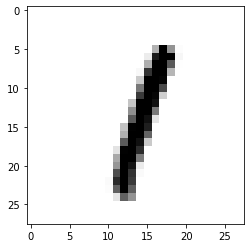

In [11]:
print("Test image prediction is:",model.predict(test_img[5:6]).argmax())

plt.imshow(test_img[5].reshape(28, 28), cmap='gray')
plt.show()

### Save the model
This saves the model so that it can be loaded elsewhere, i.e can be used in flaskapp to predict the number drawn without making the user wait until the model is created for each prediction.
- Save the entire model to a HDF5 file. - https://jovianlin.io/saving-loading-keras-models/
- The '.h5' extension indicates that the model shuold be saved to HDF5.
- Model is being saved to Web Application folder for use in Flask application

In [12]:
model.save('../Web Application/model.h5')